## 3. ETH Modeling

- Ethereum Energy Consumption Index
  https://digiconomist.net/ethereum-energy-consumption
- Ethereum hashrate 
  https://etherscan.io/chart/hashrate
- Ethereum difficulty
  https://etherscan.io/chart/difficulty
- Ethereum Marcket Price
  https://www.coindesk.com/price/ethereum

### Importing Necessary Libraries

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
# from scipy.interpolate import  interp1d

In [198]:
import os
# os.getcwd()

In [199]:
bc = pd.read_csv('/Users/lemontreeran/VENVPythonProj/cyptomodeling/ETH-DATAMODEL.csv')
bc.tail()

,Date,Hashpower,Estimated TWh per Year,Energy efficiency,Difficulty,Market Price,Block Reward
862,2019-10-13,192904.6556,7.851164,4646.085902,2461.158,181.536666,2
863,2019-10-14,188728.8483,7.877451,4764.785098,2411.799,186.123827,2
864,2019-10-16,193962.3520,7.915849,4658.820238,2492.318,174.754083,2
865,2019-10-17,193195.3343,7.926375,4683.536308,2486.530,176.390105,2
866,2019-10-18,187021.2994,7.935674,4843.826922,2407.067,173.750089,2


### Converting Dates into a Datetime Format

In [200]:
bc['Date'] = pd.to_datetime(bc.Date)
bc.dtypes

Date                      datetime64[ns]
Hashpower                        float64
Estimated TWh per Year           float64
Energy efficiency                float64
Difficulty                       float64
Market Price                     float64
Block Reward                       int64
dtype: object

### Setup the constant variable: 
#### 1. hrs_day(number of hours in a day)
#### 2. electricity_cost(13.5 cents per kWh)
#### 3. sec_hr(number of seconds in an hour)
#### 3. block_reward(2 since the data range after 17/01/2019)

In [201]:
hrs_day = 24
sec_hr = 3600
electricity_cost = 0.135

### Calculate model price

In [202]:
bc['model price'] = bc.apply(lambda x: ((x['Hashpower'] / 1000) * (electricity_cost * x['Energy efficiency'] * hrs_day)) / (((x['Block Reward'] * x['Hashpower'] * sec_hr) / (x['Difficulty'] * 1000 / 10**9 * 2**32)) * hrs_day), axis=1)

In [203]:
bc['ratio'] = bc.apply(lambda x: (x['model price'] / x['Market Price']), axis=1)
bc['baseline'] = bc.apply(lambda x: 1, axis=1)

In [204]:
bc.head()

,Date,Hashpower,Estimated TWh per Year,Energy efficiency,Difficulty,Market Price,Block Reward,model price,ratio,baseline
0,2017-05-20,29609.4667,2.338304,9015.010168,439.714,127.267172,3,212.817035,1.672207,1
1,2017-05-21,30501.1451,2.331936,8727.630565,451.327,124.900392,3,211.474275,1.693143,1
2,2017-05-22,31382.7051,2.406776,8754.700125,463.103,148.333874,3,217.665071,1.467400,1
3,2017-05-23,30236.4543,2.479116,9359.698770,448.717,159.999428,3,225.478050,1.409243,1
4,2017-05-24,30975.7050,2.558065,9427.277883,458.978,175.471684,3,232.299381,1.323857,1


### Setting dates as the index

In [205]:
bc.set_index('Date', inplace=True)
bc.index
bc['Market Price']

Date
2017-05-20    127.267172
2017-05-21    124.900392
2017-05-22    148.333874
2017-05-23    159.999428
2017-05-24    175.471684
                 ...    
2019-10-13    181.536666
2019-10-14    186.123827
2019-10-16    174.754083
2019-10-17    176.390105
2019-10-18    173.750089
Name: Market Price, Length: 867, dtype: float64

In [206]:
model_bc = bc[['Market Price','model price']]

In [207]:
model_bc.head()
model_bc.tail()

,Market Price,model price
Date,,
2019-10-13,181.536666,920.847819
2019-10-14,186.123827,925.434236
2019-10-16,174.754083,935.062286
2019-10-17,176.390105,937.839948
2019-10-18,173.750089,938.940190


### Plotting Bitcoin Model Prices

In [208]:
bc_reindexed = model_bc.reindex(pd.date_range(start=model_bc.index.min(),end=model_bc.index.max(),freq='1D'))  
bc_reindexed.interpolate(method='cubic')

,Market Price,model price
2017-05-20,127.267172,212.817035
2017-05-21,124.900392,211.474275
2017-05-22,148.333874,217.665071
2017-05-23,159.999428,225.478050
2017-05-24,175.471684,232.299381
...,...,...
2019-10-14,186.123827,925.434236
2019-10-15,181.223854,931.392700
2019-10-16,174.754083,935.062286
2019-10-17,176.390105,937.839948


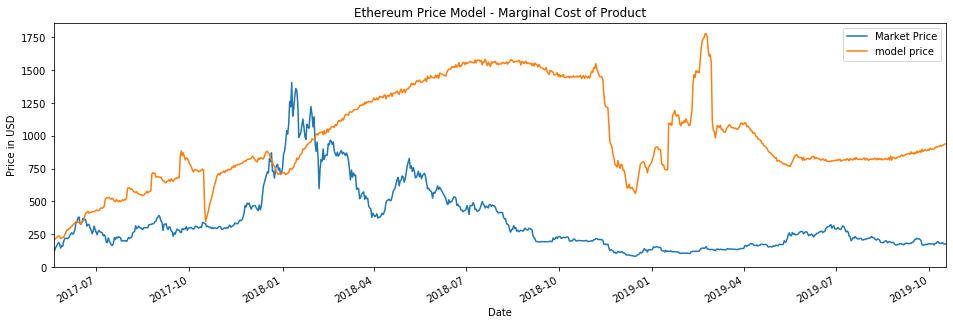

In [209]:
model_bc.plot(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Ethereum Price Model - Marginal Cost of Product')
plt.savefig('ethmodelprice.png')
plt.show()


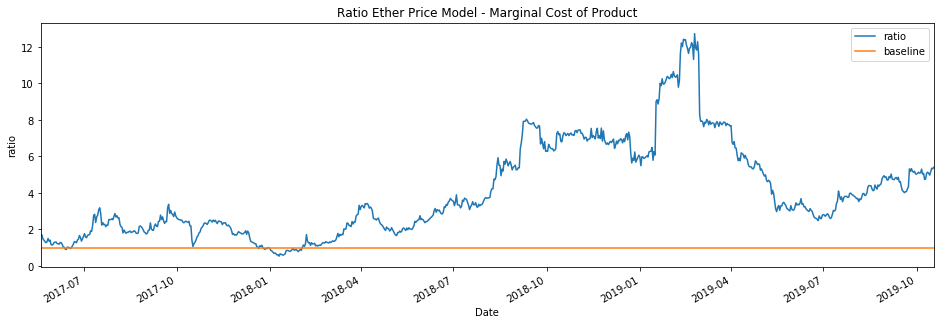

In [211]:
ratio_bc = bc[['ratio', 'baseline']]

ratio_bc.plot(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('ratio')
plt.title('Ratio Ether Price Model - Marginal Cost of Product')
plt.savefig('ethmodelpriceratio.png')
plt.show()